In [1]:
import re
import nltk

import nltk
nltk.download('stopwords')
nltk.download('punkt')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Error loading stopwords: <urlopen error [Errno 101]
[nltk_data]     Network is unreachable>
[nltk_data] Error loading punkt: <urlopen error [Errno 101] Network is
[nltk_data]     unreachable>


In [2]:
data = pd.read_csv('inputs/documents.csv')
data.head()

,document
0,My husband is a born shopper. He loves to look...
1,Tea drinking was common in China for nearly on...
2,"Once upon a time, there was a scholar who want..."
3,When newspapers and radio describe the damage ...
4,Below is a page adapted from About Wikipedia ...


In [3]:
train_data = data[:int(len(data)*0.85)]
test_data  = data[int(len(data)*0.85):]
print(len(train_data), len(test_data)) 
assert len(train_data)+len(test_data) == len(data)

21791 3846


In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [12]:
from nltk.stem import WordNetLemmatizer  
le=WordNetLemmatizer()

In [9]:
contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [15]:
import nltk
nltk.download('wordnet')

KeyboardInterrupt: 

In [16]:
def clean_documents(text):
    
    if pd.isnull(text):
        return text
    
    text = text.lower()
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
            
    text         = re.sub("[^a-zA-Z#]", ' ', text)
    word_tokens  = nltk.word_tokenize(text)
    tokens       = [le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text =" ".join(tokens)
    
    return cleaned_text

In [21]:
train_data['document_clean'] = train_data['document'].apply(clean_documents)

/tmp/ipykernel_6928/3353565021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['document_clean'] = train_data['document'].apply(clean_documents)


In [22]:
train_data.head()

,document,document_clean
0,My husband is a born shopper. He loves to look...,husband born shopper love look thing touch lik...
1,Tea drinking was common in China for nearly on...,drinking common china nearly thousand year any...
2,"Once upon a time, there was a scholar who want...",upon time scholar wanted gain knowledge even t...
3,When newspapers and radio describe the damage ...,newspaper radio describe damage caused hurrica...
4,Below is a page adapted from About Wikipedia ...,page adapted wikipedia take full advantage wik...


In [23]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [24]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=train_data['document_clean'])



In [32]:
print(words)

['people', 'time', 'said', 'year', 'like', 'child', 'make', 'life', 'school', 'world', 'work', 'good', 'student', 'thing', 'help']


In [33]:
print(word_values)

[28756, 20113, 19947, 19846, 13621, 13490, 12761, 12260, 12170, 10192, 10095, 9728, 9505, 9376, 9032]


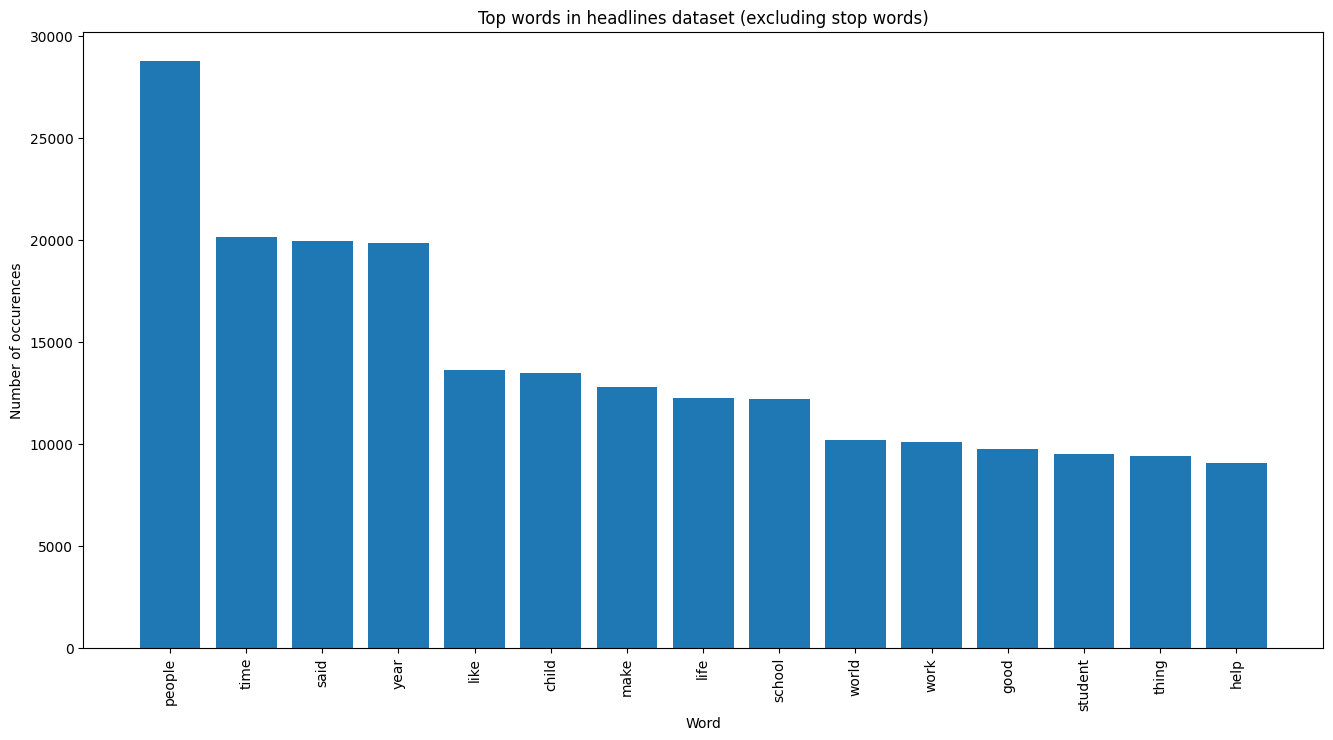

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [40]:
from textblob import TextBlob
def stats_of_documents(data_df):
    
    data = data_df['document_clean'].tolist()
    tagged_headlines = [TextBlob(data[i]).pos_tags for i in range(len(data))]
    
    tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

    word_counts = [] 
    pos_counts = {}

    for headline in tagged_headlines_df[u'tags']:
        word_counts.append(len(headline))
        for tag in headline:
            if tag[1] in pos_counts:
                pos_counts[tag[1]] += 1
            else:
                pos_counts[tag[1]] = 1

    print('Total number of words: ', np.sum(word_counts))
    print('Mean number of words per headline: ', np.mean(word_counts))
    print('Minimum number of words per headline: ', np.min(word_counts))
    print('Maximum number of words per headline: ', np.max(word_counts))

    pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
    pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

    fig, ax = plt.subplots(figsize=(18,8))
    ax.bar(range(len(pos_counts)), pos_sorted_counts);
    ax.set_xticks(range(len(pos_counts)));
    ax.set_xticklabels(pos_sorted_types);
    ax.set_title('Part-of-Speech Tagging for Headlines Corpus');
    ax.set_xlabel('Type of Word');


Total number of words:  3010456
Mean number of words per headline:  138.1513468863292
Minimum number of words per headline:  28
Maximum number of words per headline:  572


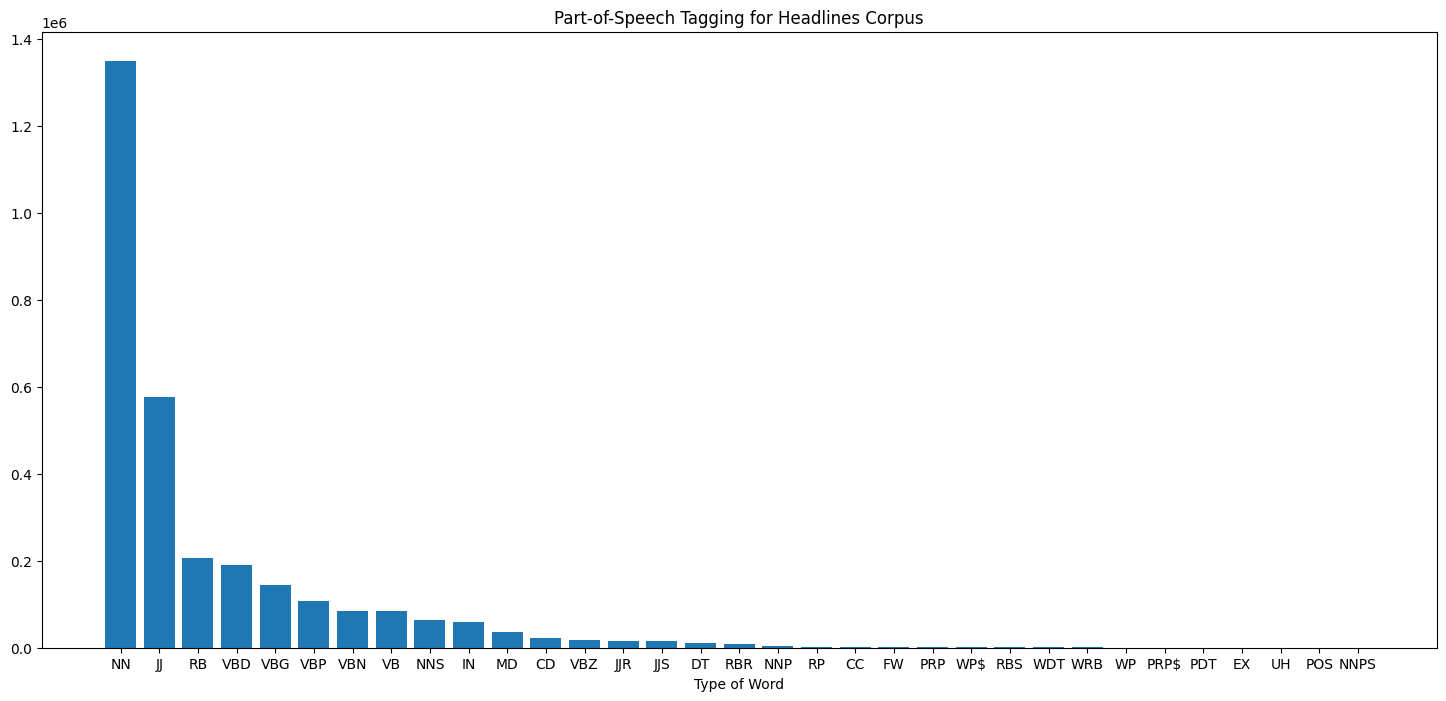

In [41]:
stats_of_documents(train_data)

In [43]:
vect        = TfidfVectorizer(stop_words=stop_words,max_features=4000)
vect_text   = vect.fit_transform(train_data['document_clean'])

In [46]:
print(vect_text[:10])

  (0, 1067)	0.07552208940324372
  (0, 3310)	0.07075677738925858
  (0, 316)	0.05083352446949446
  (0, 1303)	0.051204108096159676
  (0, 3848)	0.06246325845445214
  (0, 1247)	0.07304773881469995
  (0, 1449)	0.1643211981346948
  (0, 2822)	0.06690246291035287
  (0, 2589)	0.06815793495694415
  (0, 1487)	0.04033176726215273
  (0, 530)	0.08104567632185129
  (0, 1548)	0.04081543495747403
  (0, 1760)	0.06709391112214312
  (0, 279)	0.07889474907093547
  (0, 2611)	0.08695100871495391
  (0, 643)	0.06260586801384564
  (0, 2442)	0.05716666567315079
  (0, 1377)	0.0809385655209967
  (0, 3631)	0.025216076262281593
  (0, 3405)	0.1850386326285445
  (0, 1234)	0.10550205278262857
  (0, 2907)	0.15485806889562828
  (0, 327)	0.06547138841936058
  (0, 3418)	0.057066917571124566
  (0, 3023)	0.06549063428256915
  :	:
  (9, 467)	0.04403047205185309
  (9, 1226)	0.06219839998929132
  (9, 1401)	0.03241530368785436
  (9, 122)	0.0588146375817598
  (9, 1594)	0.042293575329588294
  (9, 43)	0.0648280275061595
  (9, 801)	0

In [49]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top   = lsa_model.fit_transform(vect_text)

In [50]:
def topics_document(model_output, n_topics , data):
    '''
    returns a dataframe for each document having topic weightages
    and the dominant topic for each doc. 
    '''
    
    # column names
    topicnames = ["Topic" + str(i) for i in range(n_topics)]
    # index names
    docnames = ["Doc" + str(i) for i in range(len(data))]
    # Make the pandas dataframe
    df_document_topic = pd.DataFrame(np.round(model_output, 2), columns=topicnames, index=docnames)
    # Get dominant topic for each document
    dominant_topic = np.argmax(df_document_topic.values, axis=1)
    df_document_topic["dominant_topic"] = dominant_topic
    
    return df_document_topic

In [52]:
documet_topic_lsa = topics_document(lsa_top, n_topics=10, data=train_data)
documet_topic_lsa

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.20,-0.10,0.09,-0.05,0.01,-0.02,0.02,-0.02,-0.06,0.11,0
Doc1,0.24,-0.09,-0.02,-0.01,-0.01,0.03,0.04,0.01,-0.07,0.07,0
Doc2,0.18,-0.03,-0.01,-0.02,0.04,-0.05,0.00,-0.04,0.00,-0.05,0
Doc3,0.11,-0.03,0.01,-0.00,0.02,0.02,-0.03,0.00,-0.03,-0.01,0
Doc4,0.12,0.02,-0.07,-0.00,0.09,0.04,-0.02,0.00,0.07,0.04,0
...,...,...,...,...,...,...,...,...,...,...,...
Doc21786,0.20,0.02,-0.07,-0.05,0.03,0.09,-0.07,-0.14,-0.10,0.15,0
Doc21787,0.27,-0.04,-0.14,-0.00,-0.02,0.13,0.03,-0.13,-0.15,0.01,0
Doc21788,0.29,-0.07,-0.01,0.07,0.15,-0.11,0.01,-0.13,-0.11,-0.03,0
Doc21789,0.18,0.04,-0.01,0.04,0.15,0.14,0.02,0.03,0.14,0.06,0


In [57]:
documet_topic_lsa['dominant_topic'].value_counts()

dominant_topic
0    19405
1      596
3      349
9      266
8      263
6      238
4      233
5      208
7      132
2      101
Name: count, dtype: int64

In [54]:
from collections import Counter
lsa_keys = get_keys(lsa_top)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

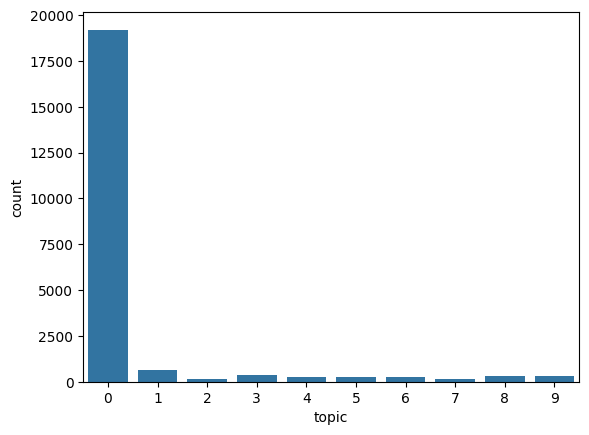

In [56]:
import seaborn as sns
topics_df = pd.DataFrame({'topic' : lsa_categories, 'count' : lsa_counts})
sns.barplot(x=topics_df['topic'], y = topics_df['count'])
plt.show()

In [59]:
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
people child said school time year student would life like 

Topic 1: 
student school child teacher parent class english education college language 

Topic 2: 
child mother father said parent would school went asked girl 

Topic 3: 
child parent kid family food people life brain adult researcher 

Topic 4: 
english language book word friend people read reading thing learn 

Topic 5: 
child chinese english language china book city country world year 

Topic 6: 
food water school animal english plant tree fish like city 

Topic 7: 
english language said word study brain animal woman mother water 

Topic 8: 
book reading read water animal story plant scientist earth reader 

Topic 9: 
food book reading read chinese meal eating said restaurant vegetable 



In [60]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors, n_topics):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [85]:
colormap = np.array(["#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
#colormap = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
colormap = colormap[:10]

In [87]:
from sklearn.manifold import TSNE
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_top)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 21791 samples in 0.019s...
[t-SNE] Computed neighbors for 21791 samples in 3.700s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21791
[t-SNE] Computed conditional probabilities for sample 2000 / 21791
[t-SNE] Computed conditional probabilities for sample 3000 / 21791
[t-SNE] Computed conditional probabilities for sample 4000 / 21791
[t-SNE] Computed conditional probabilities for sample 5000 / 21791
[t-SNE] Computed conditional probabilities for sample 6000 / 21791
[t-SNE] Computed conditional probabilities for sample 7000 / 21791
[t-SNE] Computed conditional probabilities for sample 8000 / 21791
[t-SNE] Computed conditional probabilities for sample 9000 / 21791
[t-SNE] Computed conditional probabilities for sample 10000 / 21791
[t-SNE] Computed conditional probabilities for sample 11000 / 21791
[t-SNE] Computed conditional probabilities for sample 12000 / 21791
[t-SNE] Computed conditional probabilities for sa

In [ ]:
import plotly.express as px
components = pd.DataFrame(tsne_lsa_vectors, columns=['pca1', 'pca2'])
#components['cluster'] = y_pre
#train['cluster'] = y_pre
#print(components.head())
#print(components['cluster'].value_counts())
fig = px.scatter(components, x='pca1', y='pca2', color=colormap)
fig.show()

In [71]:
from bokeh.plotting import figure
from bokeh.models import Label
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors, n_topics=10)


plot = figure(title="t-SNE Clustering of {} LSA Topics".format(10))
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(10):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                   text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

NameError: name 'Label' is not defined

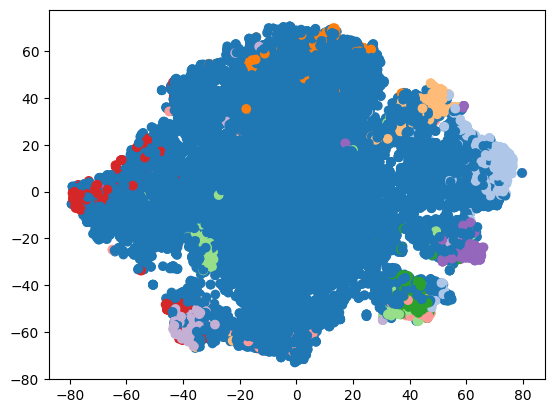

In [66]:
#plot = figure(title="t-SNE Clustering of {} LSA Topics".format(10), plot_width=700, plot_height=700)
plt.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(10):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                   text_color=colormap[t])
    plot.add_layout(label)
    
#show(plot)

In [93]:
# Generate a word cloud image for given topic
from wordcloud import WordCloud
def draw_word_cloud(index, model):
    imp_words_topic=""
    comp=model.components_[index]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]

    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


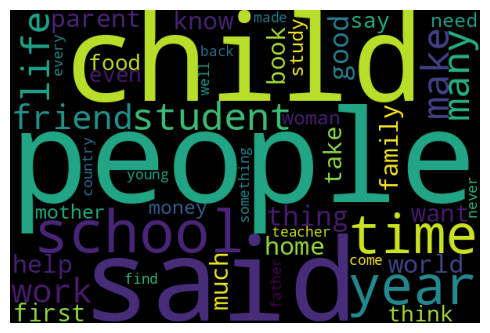

In [94]:
draw_word_cloud(0, lsa_model)